## Analysis of gold price development in an economic crash


The inspiration for this analysis is this <a href='https://www.reddit.com/r/dataisbeautiful/comments/fjvtt5/oc_current_market_sell_off_compared_to_major_ones/'> reddit post</a>, where the current crash is compared to major ones in the past.

Gold is generally known as the safe haven for investors in such crises and is therefore the profiteur of uncertain times. But is this really the case?

### Data

The gold price data is from Quandl. Quandl is a data provider, which offers acess to all sorts of quantitative data. I used it because I can query the gold price in usd from 1968 till now for free.

To identify dates for the crashes in the reddit post, I used <a href='https://en.wikipedia.org/wiki/List_of_economic_crise'>wikipedia</a> and data from the S&P500, since gold is mostly tarded in USD and the S&P 500 is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The range of dates is from the high to the bottom of the crash  
    
Starting and end dates for major crashes in the scope of our timeframe (from 1968):

- 1970s energy crisis: 11.05.1969 - 10.05.1970
- 1973 oil crisis: 02.01.1973 - 29.09.1974
- Early 1980s recession: 24.11.1980 - 02.08.1982
- Black Monday: 17.08.1987 - 30.11.1987
- Dot-com bubble: 20.03.2000 - 30.09.2002
- Financial crisis of 2007–08: 08.10.2007 - 02.03.2009
- Corona (2020): 10.02.2020 - till now (29.04.2020)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import time
from datetime import datetime
from yahoofinancials import YahooFinancials
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# ignore SettingWithCopyWarning:
pd.options.mode.chained_assignment = None

### Get the gold price

In [ ]:
quandl.ApiConfig.api_key = 'XXXX'

In [ ]:
# get the Data from quadl
# we only need the second column (USD(PM))
gold_data = quandl.get('LBMA/GOLD.2')

In [ ]:
# save dataframe to csv, to have a local copy, since we don't want to make an api request everytime we rerun this script# 
# gold_data.to_csv('gold_data.csv')

In [10]:
gold_data = pd.read_csv('gold_data.csv')
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data = gold_data.set_index('Date')

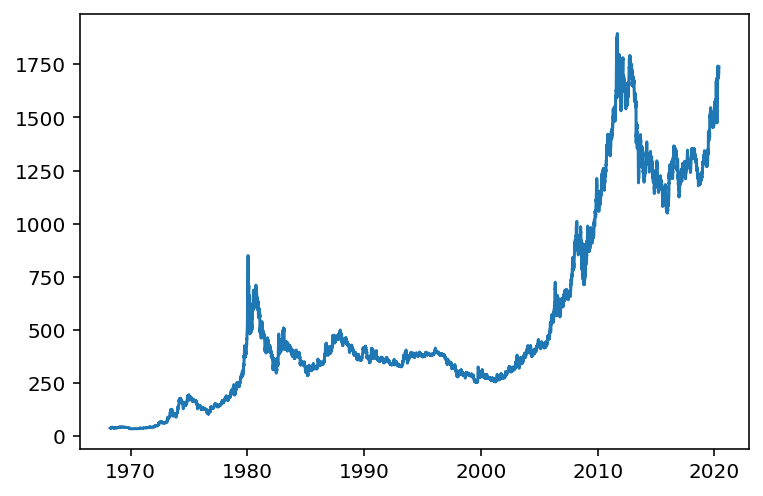

In [12]:
plt.plot(gold_data);

### Get S&P 500 data

In [13]:
ticker = '^GSPC'
yahoo_financials = YahooFinancials(ticker)

In [14]:
sp500 = yahoo_financials.get_historical_price_data(start_date='1968-04-01', end_date='2020-05-20', time_interval='daily')['^GSPC']['prices']

In [15]:
dates = []
adj_close = []

for x in range(len(sp500)):
    date = sp500[x]['formatted_date']
    value = sp500[x]['adjclose']
    
    dates.append(date)
    adj_close.append(value)

In [16]:
d = {'date' : dates, 'value' : adj_close}
sp_500 = pd.DataFrame(d)

In [17]:
sp_500['date'] = pd.to_datetime(sp_500['date'])
sp_500 = sp_500.set_index('date')

In [18]:
sp_500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13123 entries, 1968-04-01 to 2020-05-19
Data columns (total 1 columns):
value    13123 non-null float64
dtypes: float64(1)
memory usage: 205.0 KB


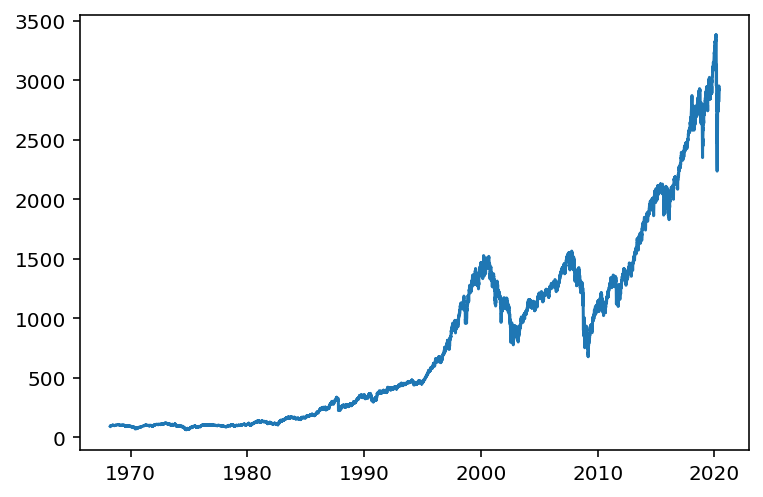

In [19]:
plt.plot(sp_500);

### Create DataFames for each crisis

In [20]:
# 1970s energy crisis: 11.05.1969 - 10.05.1970
energy_crisis_1970 = gold_data.loc['1969-05-12':'1970-09-10']
sp_energy_crisis_1970 = sp_500.loc['1969-05-12':'1970-09-10']
# 1973 oil crisis: 02.01.1973 - 29.09.1974
oil_crisis_1973 = gold_data.loc['1973-01-02':'1974-09-30']
sp_oil_crisis_1973 = sp_500.loc['1973-01-02':'1974-09-30']
# Early 1980s recession: 24.11.1980 - 02.08.1982
early_1980s_recession = gold_data.loc['1980-11-24':'1982-08-02']
sp_early_1980s_recession = sp_500.loc['1980-11-24':'1982-08-02']
# Black Monday: 17.08.1987 - 30.11.1987
black_monday = gold_data.loc['1987-08-17':'1987-11-30']
sp_black_monday = sp_500.loc['1987-08-17':'1987-11-30']
# Dot-com bubble: 20.03.2000 - 30.09.2002
dot_com_bubble = gold_data.loc['2000-03-20':'2002-09-30']
sp_dot_com_bubble = sp_500.loc['2000-03-20':'2002-09-30']
# Financial crisis of 2007–08: 08.10.2007 - 02.03.2009
financial_crisis_2007 = gold_data.loc['2007-10-08':'2009-03-02']
sp_financial_crisis_2007 = sp_500.loc['2007-10-08':'2009-03-02']
# Corona (2020): 10.02.2020 - till now (07.05.2020)
corona_2020 = gold_data.loc['2020-02-10':'2020-05-07']
sp_corona_2020 = sp_500.loc['2020-02-10':'2020-05-07']

In [21]:
# calculate cumulative ptc change for each crisis
energy_crisis_1970['sum_ptc_change_g'] = energy_crisis_1970['USD (PM)'].pct_change().cumsum()
sp_energy_crisis_1970['sum_ptc_change_sp'] = sp_energy_crisis_1970['value'].pct_change().cumsum()

oil_crisis_1973['sum_ptc_change_g'] = oil_crisis_1973['USD (PM)'].pct_change().cumsum()
sp_oil_crisis_1973['sum_ptc_change_sp'] = sp_oil_crisis_1973['value'].pct_change().cumsum()

early_1980s_recession['sum_ptc_change_g'] = early_1980s_recession['USD (PM)'].pct_change().cumsum()
sp_early_1980s_recession['sum_ptc_change_sp'] = sp_early_1980s_recession['value'].pct_change().cumsum()

black_monday['sum_ptc_change_g'] = black_monday['USD (PM)'].pct_change().cumsum()
sp_black_monday['sum_ptc_change_sp'] = sp_black_monday['value'].pct_change().cumsum()

dot_com_bubble['sum_ptc_change_g'] = dot_com_bubble['USD (PM)'].pct_change().cumsum()
sp_dot_com_bubble['sum_ptc_change_sp'] = sp_dot_com_bubble['value'].pct_change().cumsum()

financial_crisis_2007['sum_ptc_change_g'] = financial_crisis_2007['USD (PM)'].pct_change().cumsum()
sp_financial_crisis_2007['sum_ptc_change_sp'] = sp_financial_crisis_2007['value'].pct_change().cumsum()

corona_2020['sum_ptc_change_g'] = corona_2020['USD (PM)'].pct_change().cumsum()
sp_corona_2020['sum_ptc_change_sp'] = sp_corona_2020['value'].pct_change().cumsum()

#### Join Gold and S&P 500 DataFrames

- <b>merge</b> is an inner join by default
- <b>join</b> is a left join by default
- <b>concat</b> is an outer join by default

We need to make an inner join because the dates in the timeframe aren't equal and therefore days befor and during the crisis wouldn't add up in the visualization.

In [22]:
# join DataFrames with Gold and S&P 500 values on the Datetimeindex
energy_crisis_1970 = pd.merge(energy_crisis_1970, sp_energy_crisis_1970, left_index=True, right_index=True)

In [23]:
oil_crisis_1973 = pd.merge(oil_crisis_1973, sp_oil_crisis_1973, left_index=True, right_index=True)
early_1980s_recession = pd.merge(early_1980s_recession, sp_early_1980s_recession, left_index=True, right_index=True)
black_monday = pd.merge(black_monday, sp_black_monday, left_index=True, right_index=True)
dot_com_bubble = pd.merge(dot_com_bubble, sp_dot_com_bubble, left_index=True, right_index=True)
financial_crisis_2007 = pd.merge(financial_crisis_2007, sp_financial_crisis_2007, left_index=True, right_index=True)
corona_2020 = pd.merge(corona_2020, sp_corona_2020, left_index=True, right_index=True)

In [24]:
# create days from top
energy_crisis_1970['days_in_crisis'] = np.arange(0,len(energy_crisis_1970), 1)
oil_crisis_1973['days_in_crisis'] = np.arange(0,len(oil_crisis_1973), 1)
early_1980s_recession['days_in_crisis'] = np.arange(0,len(early_1980s_recession), 1)
black_monday['days_in_crisis'] = np.arange(0,len(black_monday), 1)
dot_com_bubble['days_in_crisis'] = np.arange(0,len(dot_com_bubble), 1)
financial_crisis_2007['days_in_crisis'] = np.arange(0,len(financial_crisis_2007), 1)
corona_2020['days_in_crisis'] = np.arange(0,len(corona_2020), 1)

In [25]:
# create function to get the gold prices before the crisis
def p_crisis(df_gold, df_sp, from_date, d):
    '''
    df_gold = DataFrame with Gold prices
    df_sp = DataFrame with S&P prices
    from_date = Date from which we start counting back
    d = how many days
    '''
    
    # claculate the start day for a period of x days
    end = datetime.strptime(from_date, '%Y-%m-%d')
    start = end - pd.offsets.Day(d)
    # inspired by https://stackoverflow.com/questions/40192704/filter-pandas-dataframe-for-past-x-days
    
    # create the DataFrame with the dates
    df_gold = df_gold.loc[start:from_date]
    df_sp = df_sp.loc[start:from_date]
    
    # sort the index to calculate cumulative sum
    df_gold.sort_index(ascending = False, inplace = True)
    df_gold['sum_ptc_change_g'] = df_gold['USD (PM)'].pct_change().cumsum()
    
    df_sp.sort_index(ascending = False, inplace = True)
    df_sp['sum_ptc_change_sp'] = df_sp['value'].pct_change().cumsum()
    
    # join DataFrames on DateTimeIndex
    df = pd.merge(df_gold, df_sp, left_index=True, right_index=True)
    
    # create days in crisis
    df['days_in_crisis'] = np.arange(0,-len(df), -1)
    
    # redo sort index 
    df.sort_index(ascending = True, inplace = True)
    
    # exclude the last row because it would be dublicated by appending the DataFrames
    df = df.iloc[:-1]
    
    return df

In [26]:
# create the DataFrame with 
p_1970 = p_crisis(gold_data, sp_500, '1969-05-12', 100)
p_1973 = p_crisis(gold_data, sp_500, '1969-01-02', 100)
p_1980 = p_crisis(gold_data, sp_500, '1980-11-24', 100)
p_1987 = p_crisis(gold_data, sp_500, '1987-08-17', 100)
p_2000 = p_crisis(gold_data, sp_500, '2000-03-20', 100)
p_2007 = p_crisis(gold_data, sp_500, '2007-10-08', 100)
p_2020 = p_crisis(gold_data, sp_500, '2020-02-10', 100)

In [27]:
# function to append DataFrames
def append_DataFrame(p_df, c_df):
    '''
    p_df = DataFrame containing the prices prio crisis 
    c_df = DataFrame containign the prices in the crisis    
    '''
    df = p_df.append(c_df)
    return df

In [28]:
# create the finale DataFrame with the data before and during the crisis
energy_crisis_1970 = append_DataFrame(p_1970, energy_crisis_1970)
oil_crisis_1973 = append_DataFrame(p_1973, oil_crisis_1973)
early_1980s_recession = append_DataFrame(p_1980, early_1980s_recession)
black_monday = append_DataFrame(p_1987, black_monday)
dot_com_bubble = append_DataFrame(p_2000, dot_com_bubble)
financial_crisis_2007 = append_DataFrame(p_2007, financial_crisis_2007)
corona_2020 = append_DataFrame(p_2020, corona_2020)

#### Create the chart

In [30]:
# set the style to give the chart a grid
sns.set_style('whitegrid')

In [31]:
ticks = np.arange(-0.75, 1.25, 0.25)
tick_names = ['-75%', '-50%', '-25%', '0%', '+25%', '+50%', '+75%', '+100%']

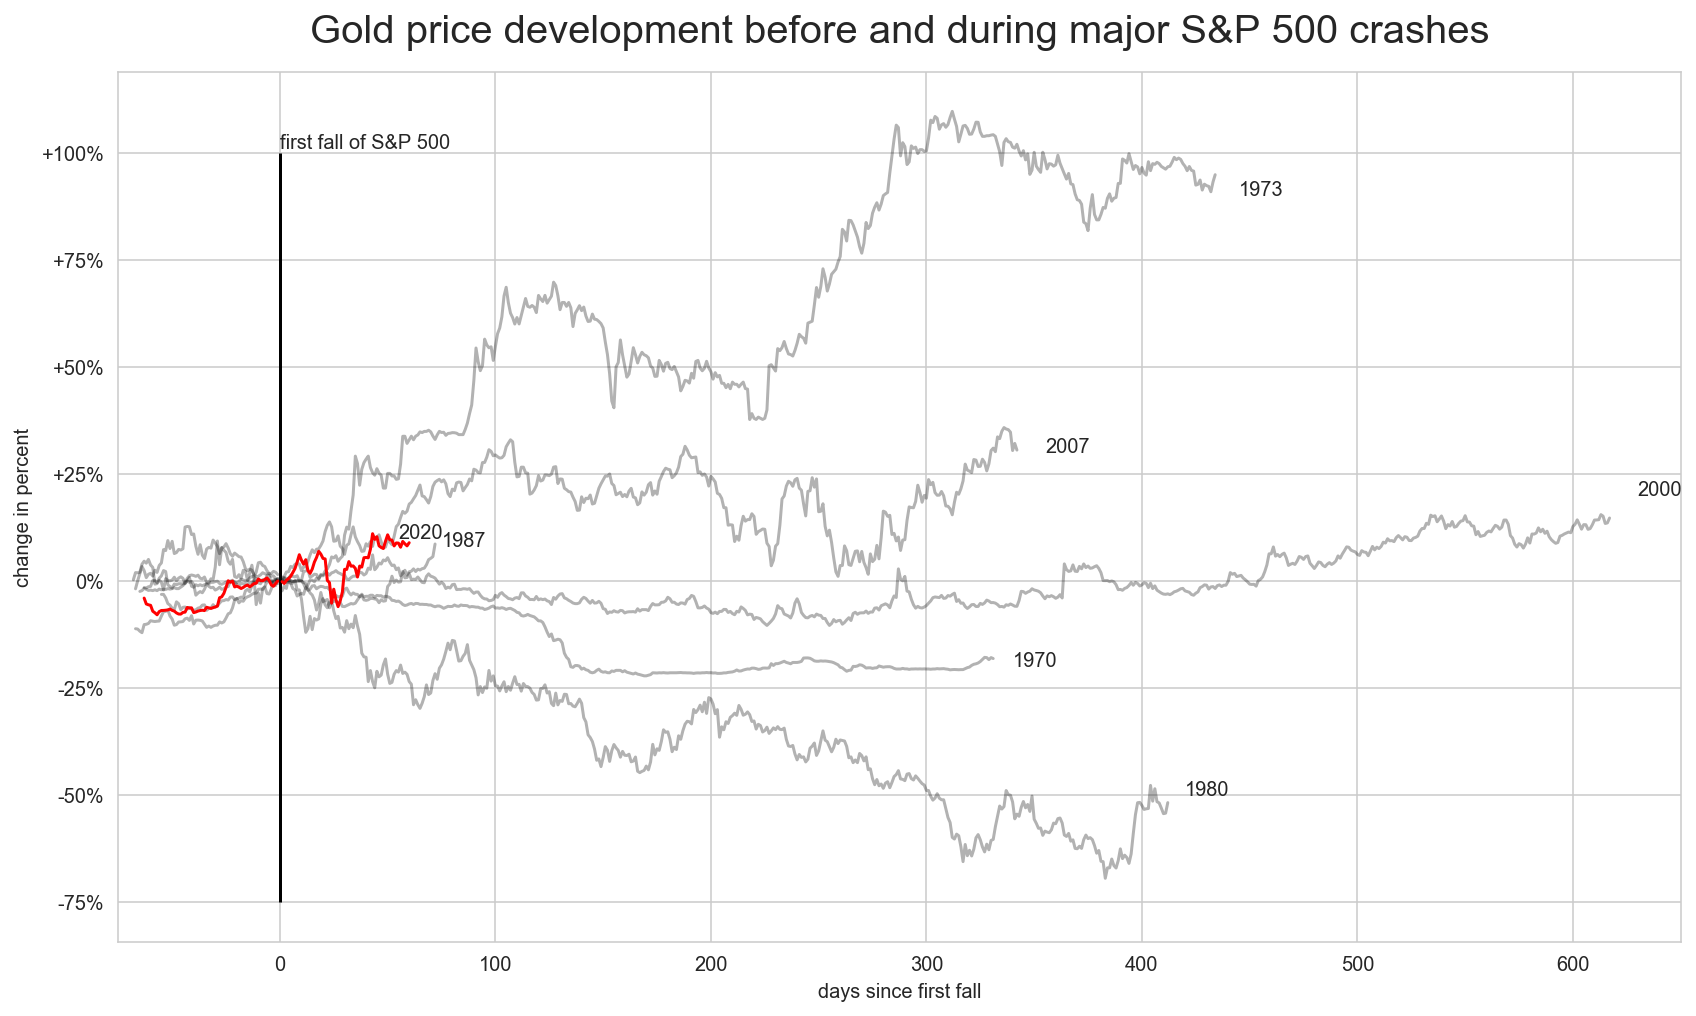

In [33]:
plt.subplots(figsize=(14,8))

plt.plot(energy_crisis_1970['days_in_crisis'], energy_crisis_1970['sum_ptc_change_g'], label='1970', color='k', alpha=0.3)
plt.plot(oil_crisis_1973['days_in_crisis'], oil_crisis_1973['sum_ptc_change_g'], label='1973', color='k', alpha=0.3)
plt.plot(early_1980s_recession['days_in_crisis'], early_1980s_recession['sum_ptc_change_g'], label='1980', color='k', alpha=0.3)
plt.plot(black_monday['days_in_crisis'], black_monday['sum_ptc_change_g'], label='1987', color='k', alpha=0.3)
plt.plot(dot_com_bubble['days_in_crisis'], dot_com_bubble['sum_ptc_change_g'], label='2000', color='k', alpha=0.3)
plt.plot(financial_crisis_2007['days_in_crisis'], financial_crisis_2007['sum_ptc_change_g'], label='2007', color='k', alpha=0.3)
plt.plot(corona_2020['days_in_crisis'], corona_2020['sum_ptc_change_g'], label='2020', color='r')

plt.annotate('1970', xy=(340, -0.2))
plt.annotate('1973', xy=(445, 0.9))
plt.annotate('1980', xy=(420, -0.5))
plt.annotate('1987', xy=(75, 0.08))
plt.annotate('2000', xy=(630, 0.2))
plt.annotate('2007', xy=(355, 0.3))
plt.annotate('2020', xy=(55, 0.10))

plt.vlines(0, colors='k', ymin=-0.75, ymax=1)
plt.annotate('first fall of S&P 500', xy=(0, 1.01))

plt.xlim(-75,650)
plt.yticks(ticks, tick_names)
plt.title('Gold price development before and during major S&P 500 crashes', fontsize=20, pad=15)
plt.xlabel('days since first fall')
plt.ylabel('change in percent')
plt.savefig('Gold_price_development_during_crashes.png', dpi=300);

#### define function for one on one visualization

In [54]:
def one_one_plot(df, crisis_name):
    '''
    df= DataFrame for crisis
    crisis_name = name of the crisis
    '''
    
    plt.subplots(figsize=(12,6))
    
    plt.plot(df['days_in_crisis'], df['sum_ptc_change_g'], label = 'Gold', color = 'r')
    plt.plot(df['days_in_crisis'], df['sum_ptc_change_sp'], label = 'S&P 500', color = 'k', alpha = 0.3) 

    plt.vlines(0, colors='k', ymin=-0.75, ymax=1)
    plt.annotate('first fall of S&P 500', xy=(0, 1.01))

    plt.xlim(-75,len(df))
    plt.yticks(ticks, tick_names)
    plt.title(f'{crisis_name}: Gold and S&P 500 price development', fontsize=20, pad=15)
    plt.xlabel('days before and after the first fall of the S&P 500')
    plt.ylabel('change in percent')
    plt.legend();

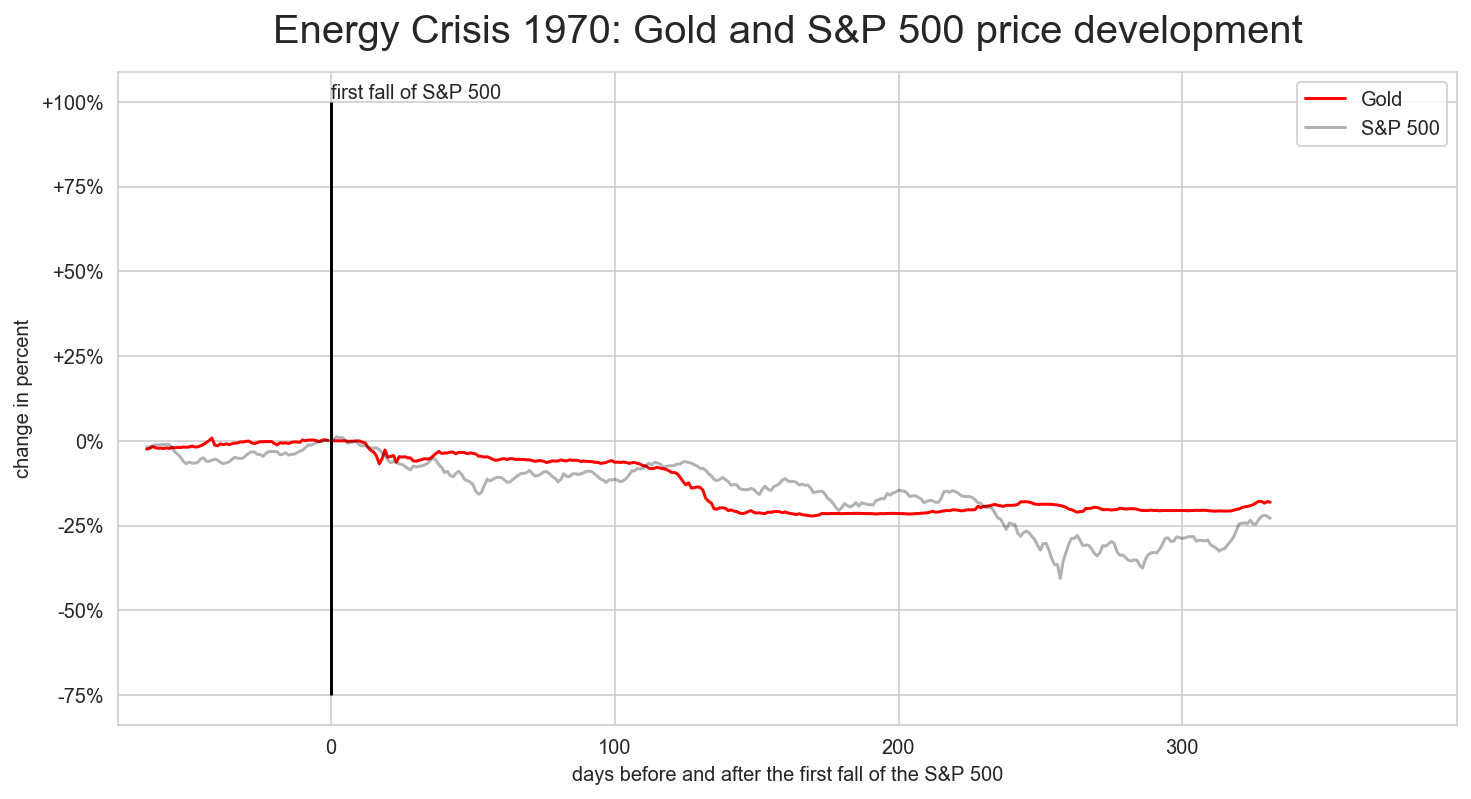

In [55]:
one_one_plot(energy_crisis_1970, 'Energy Crisis 1970')

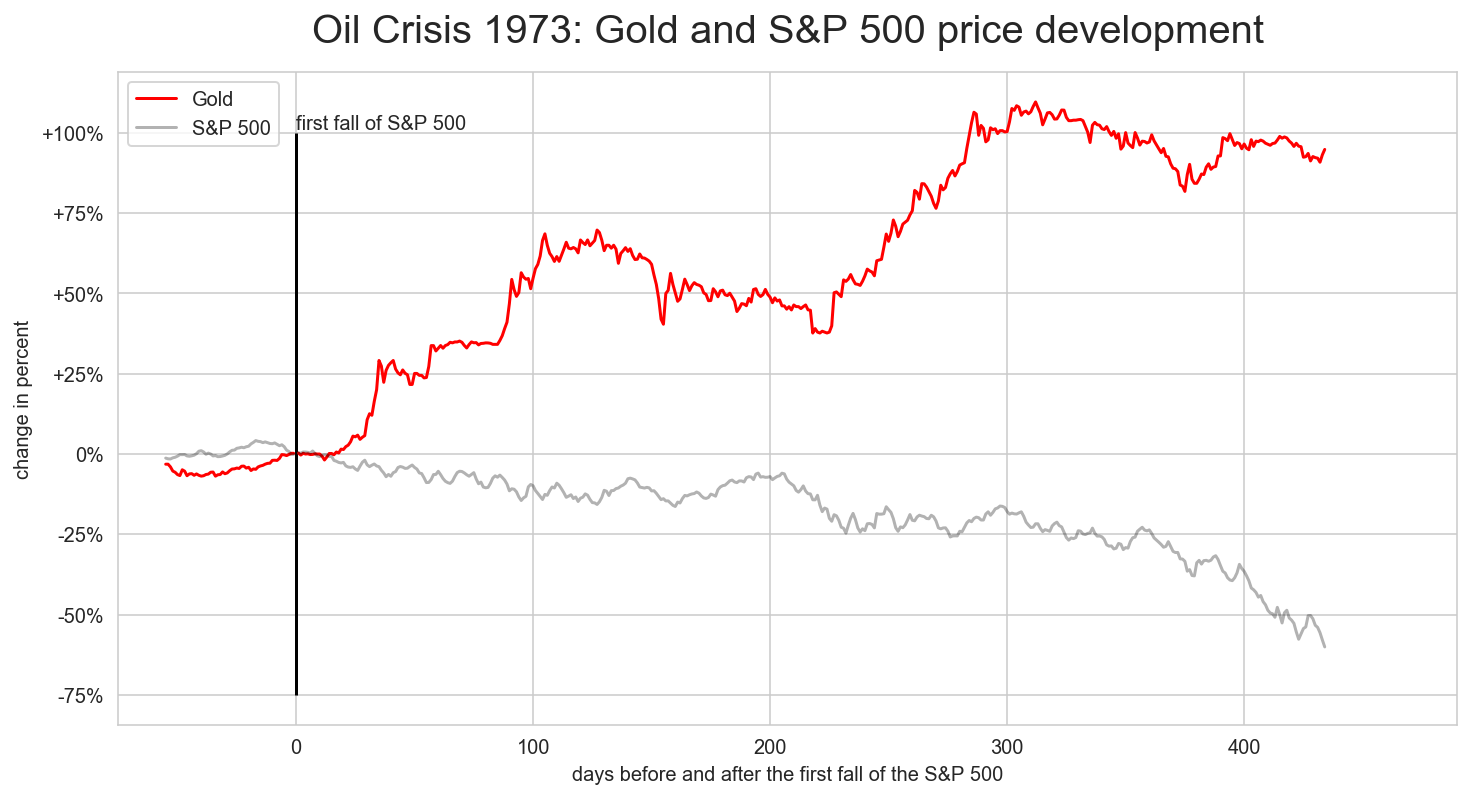

In [56]:
one_one_plot(oil_crisis_1973, 'Oil Crisis 1973')

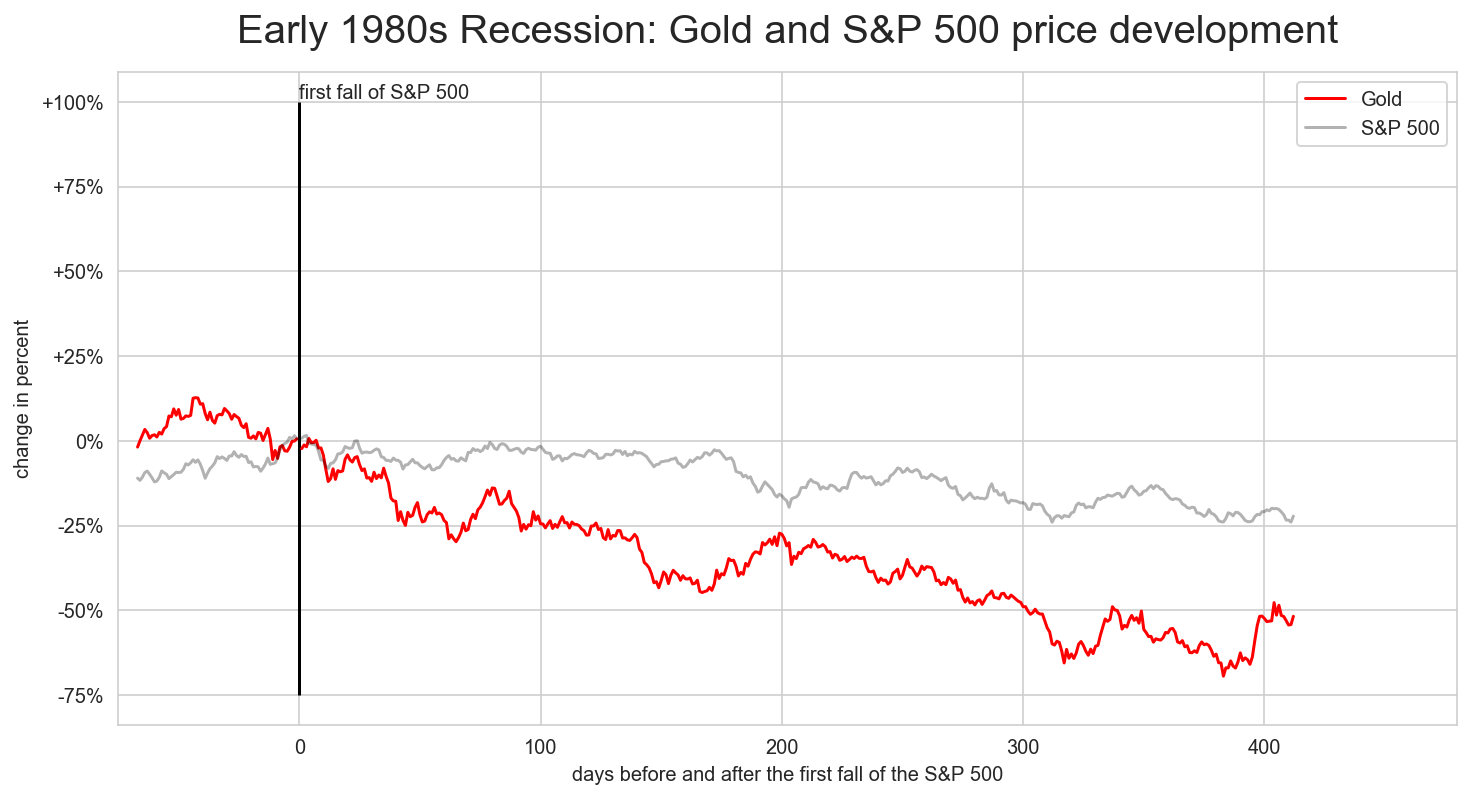

In [57]:
one_one_plot(early_1980s_recession, 'Early 1980s Recession')

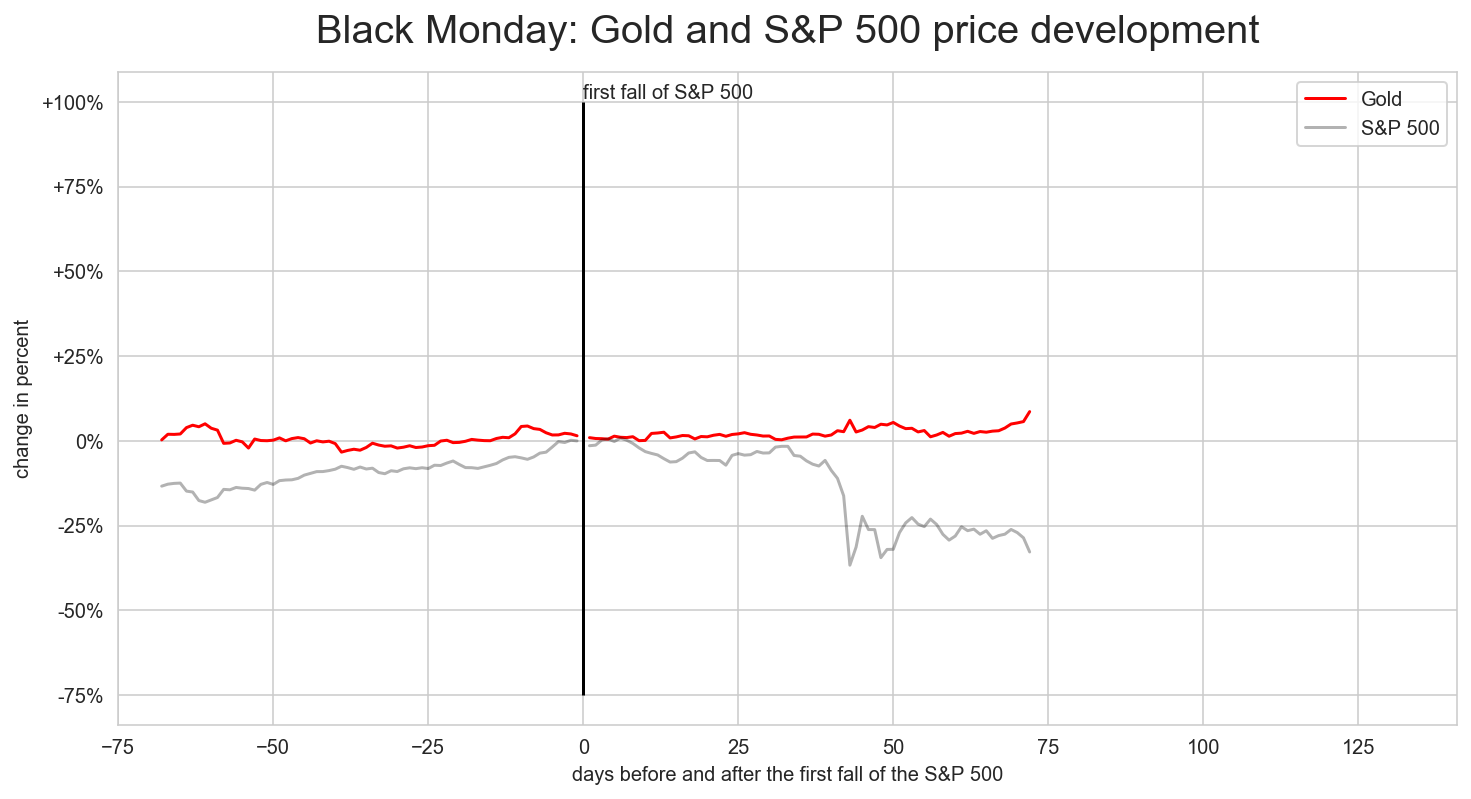

In [58]:
one_one_plot(black_monday, 'Black Monday')

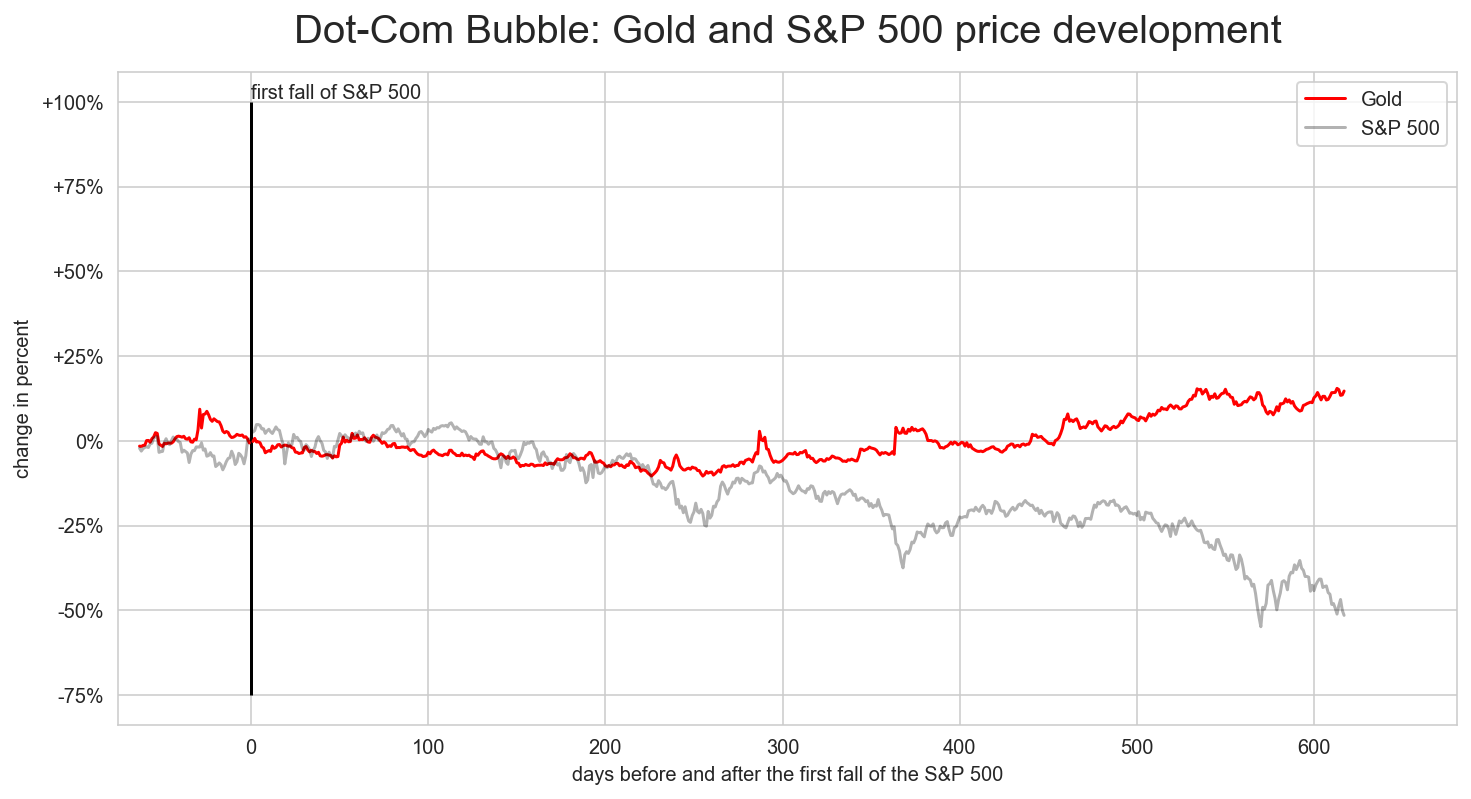

In [59]:
one_one_plot(dot_com_bubble, 'Dot-Com Bubble')

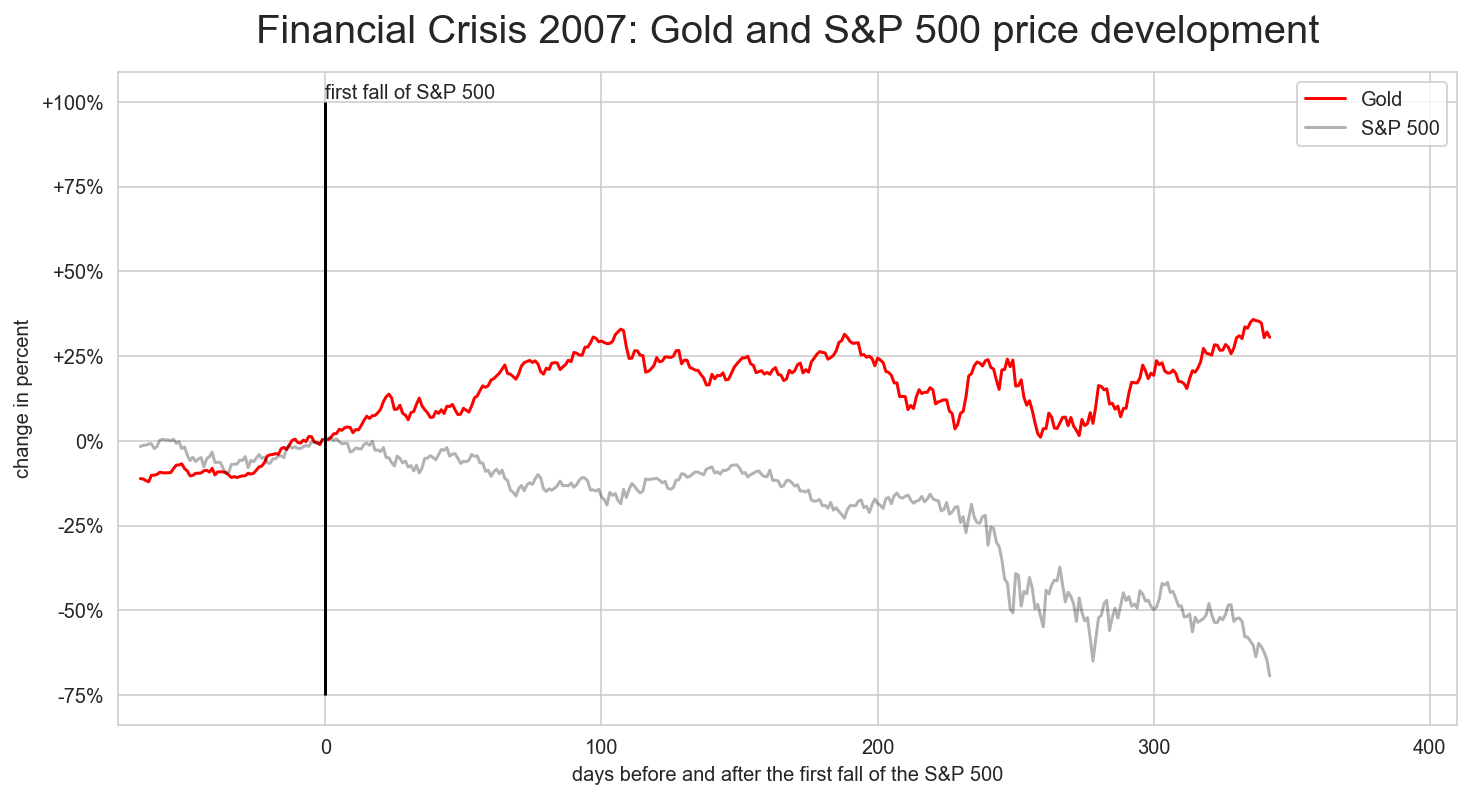

In [60]:
one_one_plot(financial_crisis_2007, 'Financial Crisis 2007')

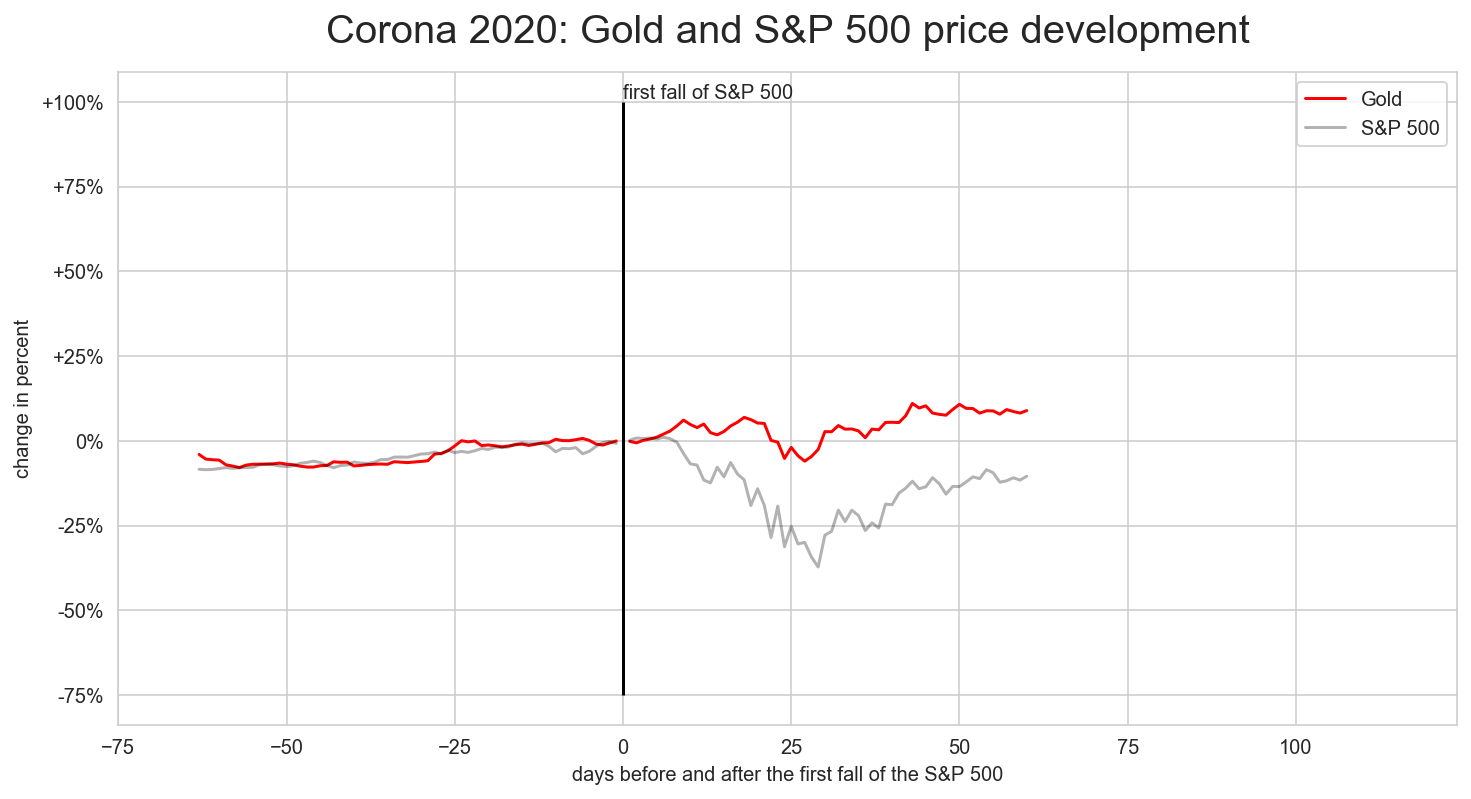

In [61]:
one_one_plot(corona_2020, 'Corona 2020')

## Conclusions

In [ ]:
# To-Do
# Make a zoom in on the first day of the drop 
# do the visualization with different libraries: Bokeh, plotly

## Resources
- https://www.quandl.com/data/LBMA-London-Bullion-Market-Association
- https://finance.yahoo.com/quote/%5EGSPC/
- https://stackoverflow.com/questions/35090498/how-to-calculate-percent-change-compared-to-the-beginning-value-using-pandas
- https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas